# Logistic Regression with Multiple Features

You will find this tutorial series much better if you follow along [This](https://www.coursera.org/learn/machine-learning) course. It's free and has very good explantion of algos. My series will be only about it's implementation in Python.

I repeat **Concepts and Algos** will **not** be taught in this series

# Importing Required Modules

Check out the 1st part of this seeries in this repository for this prerequisites for this course

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

# Getting Ready

## Data

Like last time, we will be using the data from Iris dataset.


Show below is a logistic-regression classifiers decision boundaries on the
first two dimensions (sepal length and width) of the 
[Iris Flower Dataset](https://en.wikipedia.org/wiki/Iris_flower_data_set) dataset. 

This is a better visualization from [Kaggle](https://www.kaggle.com/arshid/iris-flower-dataset) 

The datapoints
are colored according to their labels.

In [2]:
# import some data to play with
iris = datasets.load_iris()

# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

## Plotting the Datapoints

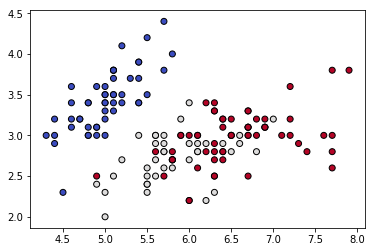

In [3]:
plt.scatter(X[:, 0], X[:, 1], c = y, cmap=plt.cm.coolwarm, edgecolors='k')

## Making a Mesh Grdid Function

It will be easier to make a meshgrid function so I can call it whenever I need. Also, I can kang this code to any other I need... ; P

In [4]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

## Making a Contour Plotter

In [5]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

# Training our SVM

In [6]:
model = svm.SVC(gamma=0.5)
model.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [7]:
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

## Visualization of our Work

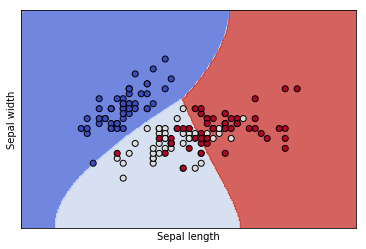

In [8]:
fig, sub = plt.subplots()
ax = sub
plot_contours(ax, model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, edgecolors='k')
ax.set_xlabel('Sepal length')
ax.set_ylabel('Sepal width')
ax.set_xticks(())
ax.set_yticks(())
plt.show()

In [9]:
model.score(X, y)

0.8266666666666667